# 2022-05-20_BCM_3-0--3-5_analysis
2022-05-20: Basalt Cube Model Visualisations: Models 3-0 to 3-5

Liu's Diagrams:
* Calcite, ?D Model Derived
* Siderite, ?D Model Derived
* Magnesite, ?D Model Derived

Dodd's Models:
* Model 3-0: 0D, Flow Basalt
* Model 3-1: 0D, Mixed Basalt
* Model 3-2: 0D, Serpentinised Basalt
* Model 3-3: 0D, Flow Basalt (Rate Adapted)
* Model 3-4: 0D, Mixed Basalt (Rate Adapted)
* Model 3-5: 0D, Serpentinised Basalt (Rate Adapted)

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Liu's Data Imported and Formatted

In [2]:
Calcite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Calcite.csv"
Siderite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Siderite.csv"
Magnesite_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Magnesite.csv"
Carbonates_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Carbonates.csv"
Porosity_liu_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/Liu_data/Porosity.csv"

Calcite_liu_df = pd.read_csv(Calcite_liu_path)
Siderite_liu_df = pd.read_csv(Siderite_liu_path)
Magnesite_liu_df = pd.read_csv(Magnesite_liu_path)
Carbonates_liu_df = pd.read_csv(Carbonates_liu_path)
Porosity_liu_df = pd.read_csv(Porosity_liu_path)

In [3]:
def df_interpreter(df, mineral, basalt):
    df = df.filter(["Time", mineral, "Basalt"])
    df = df[df["Basalt"] == basalt]
    x = df.Time
    y = df[mineral]
    return x, y

In [4]:
xy_FB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "FB")
xy_FB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "FB")
xy_FB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "FB")
xy_FB_CarbVol_liu = df_interpreter(Carbonates_liu_df, "Carbonates", "FB")
xy_FB_PoroVol_liu = df_interpreter(Porosity_liu_df, "Porosity", "FB")

xy_MB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "MB")
xy_MB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "MB")
xy_MB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "MB")
xy_MB_CarbVol_liu = df_interpreter(Carbonates_liu_df, "Carbonates", "MB")
xy_MB_PoroVol_liu = df_interpreter(Porosity_liu_df, "Porosity", "MB")

xy_SB_CalVol_liu = df_interpreter(Calcite_liu_df, "Calcite", "SB")
xy_SB_SidVol_liu = df_interpreter(Siderite_liu_df, "Siderite", "SB")
xy_SB_MagVol_liu = df_interpreter(Magnesite_liu_df, "Magnesite", "SB")
xy_SB_CarbVol_liu = df_interpreter(Carbonates_liu_df, "Carbonates", "SB")
xy_SB_PoroVol_liu = df_interpreter(Porosity_liu_df, "Porosity", "SB")

# Dodd's Data Imported and Formatted

In [5]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [6]:
def time_finder(in_file_path):
    with open(in_file_path) as f:
        t = f.read().strip()
    m = re.findall(r"^spatial_profile.+?$", t, re.MULTILINE)
    m = m[0]
    m = m.split()
    m = m[1:]
    m.append("1E-12")
    m_float = [float(x) for x in m]
    return m_float

In [7]:
# Iterate through all the files in order, generating dataframes that need compiling.
def csv_dfer(directory, in_file_path):
    catList, max_time = data_cats(directory)
    times = time_finder(in_file_path)
    metric_final_dataframes = []
    for _ in catList:
        metric_dataframes = []
        for __,___ in zip(range(max_time), times):
            df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
            df["timestep"] = str(___)
            metric_dataframes.append(df)
        df = pd.concat(metric_dataframes)
        df["metric"] = str(_)
        metric_final_dataframes.append(df)
    final_df = pd.concat(metric_final_dataframes)
    return final_df

In [8]:
infile_path_FB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/bcm/2022-05-20_bcm_3-0/basalt.in"
infile_path_MB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-20_bcm_3-1/basalt.in"
infile_path_SB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-20_bcm_3-2/basalt.in"
infile_path_FB_adapted = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/CrunchFlow_Work/bcm/2022-05-21_bcm_3-3/basalt.in"
infile_path_MB_adapted = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-21_bcm_3-4/basalt.in"
infile_path_SB_adapted = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/bcm/2022-05-21_bcm_3-5/basalt.in"

directory_path_FB = (infile_path_FB.replace('/basalt.in','')) + "/tec2csv"
directory_path_MB = (infile_path_MB.replace('/basalt.in','')) + "/tec2csv"
directory_path_SB = (infile_path_SB.replace('/basalt.in','')) + "/tec2csv"
directory_path_FB_adapted = (infile_path_FB_adapted.replace('/basalt.in','')) + "/tec2csv"
directory_path_MB_adapted = (infile_path_MB_adapted.replace('/basalt.in','')) + "/tec2csv"
directory_path_SB_adapted = (infile_path_SB_adapted.replace('/basalt.in','')) + "/tec2csv"

df_FB = csv_dfer(directory_path_FB, infile_path_FB)
df_MB = csv_dfer(directory_path_MB, infile_path_MB)
df_SB = csv_dfer(directory_path_SB, infile_path_SB)
df_FB_adapted = csv_dfer(directory_path_FB_adapted, infile_path_FB)
df_MB_adapted = csv_dfer(directory_path_MB_adapted, infile_path_MB)
df_SB_adapted = csv_dfer(directory_path_SB_adapted, infile_path_SB)

In [9]:
def df_prepper(df, mineral, metric):
    df = df.filter(["timestep", "metric", mineral])
    df = df.dropna(axis=0)
    df = df[df["metric"] == metric]
    df = df.drop("metric", axis=1)
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    df = df.astype(float)
    x = df.timestep
    y = df[mineral]
    return x, y

In [10]:
xy_FB_CalVol_Dodd = df_prepper(df_FB, "Calcite", "volume")
xy_FB_SidVol_Dodd = df_prepper(df_FB, "Siderite", "volume")
xy_FB_MagVol_Dodd = df_prepper(df_FB, "Magnesite", "volume")

xy_MB_CalVol_Dodd = df_prepper(df_MB, "Calcite", "volume")
xy_MB_SidVol_Dodd = df_prepper(df_MB, "Siderite", "volume")
xy_MB_MagVol_Dodd = df_prepper(df_MB, "Magnesite", "volume")

xy_SB_CalVol_Dodd = df_prepper(df_SB, "Calcite", "volume")
xy_SB_SidVol_Dodd = df_prepper(df_SB, "Siderite", "volume")
xy_SB_MagVol_Dodd = df_prepper(df_SB, "Magnesite", "volume")

xy_FB_CalVol_adapted_Dodd = df_prepper(df_FB_adapted, "Calcite", "volume")
xy_FB_SidVol_adapted_Dodd = df_prepper(df_FB_adapted, "Siderite", "volume")
xy_FB_MagVol_adapted_Dodd = df_prepper(df_FB_adapted, "Magnesite", "volume")

xy_MB_CalVol_adapted_Dodd = df_prepper(df_MB_adapted, "Calcite", "volume")
xy_MB_SidVol_adapted_Dodd = df_prepper(df_MB_adapted, "Siderite", "volume")
xy_MB_MagVol_adapted_Dodd = df_prepper(df_MB_adapted, "Magnesite", "volume")

xy_SB_CalVol_adapted_Dodd = df_prepper(df_SB_adapted, "Calcite", "volume")
xy_SB_SidVol_adapted_Dodd = df_prepper(df_SB_adapted, "Siderite", "volume")
xy_SB_MagVol_adapted_Dodd = df_prepper(df_SB_adapted, "Magnesite", "volume")

# Carbonate Volume Comparison - By Mineral

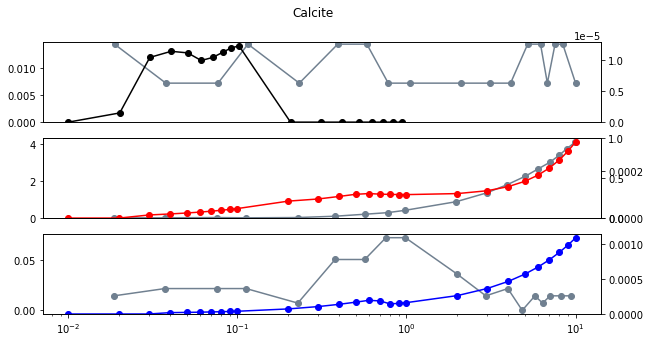

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Calcite')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_FB_CalVol_liu[0], xy_FB_CalVol_liu[1], color='slategrey', marker='o', label="FB")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_FB_CalVol_Dodd[0], xy_FB_CalVol_Dodd[1], color='black', marker='o', label="SB")
ax4.set_ylim(bottom=0)

ax2.plot(xy_MB_CalVol_liu[0], xy_MB_CalVol_liu[1], color='slategrey', marker='o', label="MB")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_MB_CalVol_Dodd[0], xy_MB_CalVol_Dodd[1], color='red', marker='o', label="SB")
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_SB_CalVol_liu[0], xy_SB_CalVol_liu[1], color='slategrey', marker='o', label="SB")
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_SB_CalVol_Dodd[0], xy_SB_CalVol_Dodd[1], color='blue', marker='o', label="SB")
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

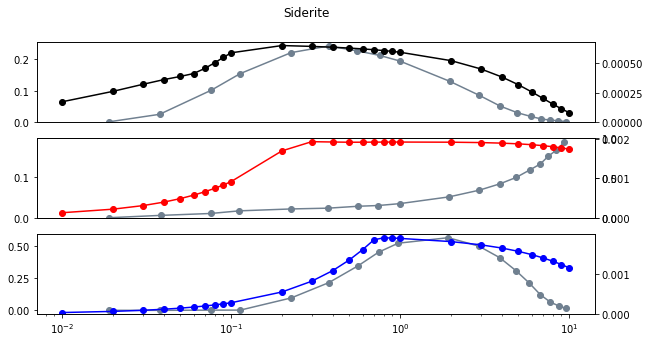

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Siderite')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_FB_SidVol_liu[0], xy_FB_SidVol_liu[1], color='slategrey', marker='o', label="FB")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_FB_SidVol_Dodd[0], xy_FB_SidVol_Dodd[1], color='black', marker='o', label="SB")
ax4.set_ylim(bottom=0)

ax2.plot(xy_MB_SidVol_liu[0], xy_MB_SidVol_liu[1], color='slategrey', marker='o', label="MB")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_MB_SidVol_Dodd[0], xy_MB_SidVol_Dodd[1], color='red', marker='o', label="SB")
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_SB_SidVol_liu[0], xy_SB_SidVol_liu[1], color='slategrey', marker='o', label="SB")
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_SB_SidVol_Dodd[0], xy_SB_SidVol_Dodd[1], color='blue', marker='o', label="SB")
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

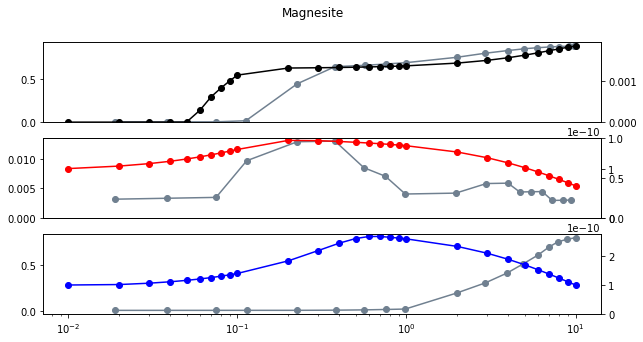

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('Magnesite')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_FB_MagVol_liu[0], xy_FB_MagVol_liu[1], color='slategrey', marker='o', label="FB")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_FB_MagVol_Dodd[0], xy_FB_MagVol_Dodd[1], color='black', marker='o', label="SB")
ax4.set_ylim(bottom=0)

ax2.plot(xy_MB_MagVol_liu[0], xy_MB_MagVol_liu[1], color='slategrey', marker='o', label="MB")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_MB_MagVol_Dodd[0], xy_MB_MagVol_Dodd[1], color='red', marker='o', label="SB")
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_SB_MagVol_liu[0], xy_SB_MagVol_liu[1], color='slategrey', marker='o', label="SB")
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_SB_MagVol_Dodd[0], xy_SB_MagVol_Dodd[1], color='blue', marker='o', label="SB")
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

# Carbonate Volume Comparison - By Basalt Model

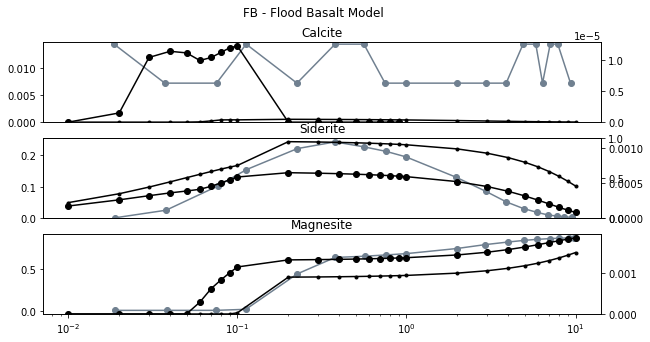

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('FB - Flood Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_FB_CalVol_liu[0], xy_FB_CalVol_liu[1], color='slategrey', marker='o')
ax1.set_title("Calcite")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_FB_CalVol_Dodd[0], xy_FB_CalVol_Dodd[1], color='black', marker='o')
ax4.plot(xy_FB_CalVol_adapted_Dodd[0], xy_FB_CalVol_adapted_Dodd[1], color='black', marker='.')
ax4.set_ylim(bottom=0)

ax2.plot(xy_FB_SidVol_liu[0], xy_FB_SidVol_liu[1], color='slategrey', marker='o')
ax2.set_title("Siderite")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_FB_SidVol_Dodd[0], xy_FB_SidVol_Dodd[1], color='black', marker='o')
ax5.plot(xy_FB_SidVol_adapted_Dodd[0], xy_FB_SidVol_adapted_Dodd[1], color='black', marker='.')
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_FB_MagVol_liu[0], xy_FB_MagVol_liu[1], color='slategrey', marker='o')
ax3.set_title("Magnesite")
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_FB_MagVol_Dodd[0], xy_FB_MagVol_Dodd[1], color='black', marker='o')
ax6.plot(xy_FB_MagVol_adapted_Dodd[0], xy_FB_MagVol_adapted_Dodd[1], color='black', marker='.')
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

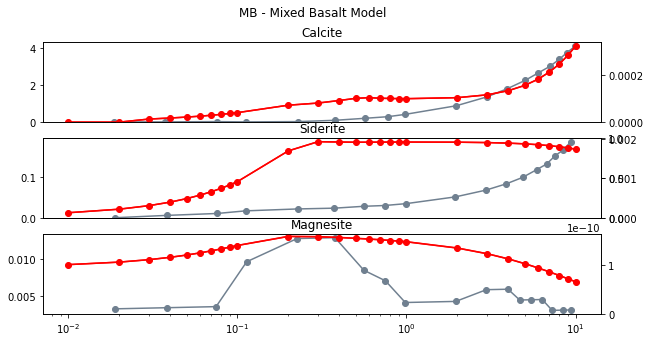

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('MB - Mixed Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_MB_CalVol_liu[0], xy_MB_CalVol_liu[1], color='slategrey', marker='o')
ax1.set_title("Calcite")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_MB_CalVol_Dodd[0], xy_MB_CalVol_Dodd[1], color='red', marker='o')
ax4.plot(xy_MB_CalVol_adapted_Dodd[0], xy_MB_CalVol_adapted_Dodd[1], color='red', marker='.')
ax4.set_ylim(bottom=0)

ax2.plot(xy_MB_SidVol_liu[0], xy_MB_SidVol_liu[1], color='slategrey', marker='o')
ax2.set_title("Siderite")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_MB_SidVol_Dodd[0], xy_MB_SidVol_Dodd[1], color='red', marker='o')
ax5.plot(xy_MB_SidVol_adapted_Dodd[0], xy_MB_SidVol_adapted_Dodd[1], color='red', marker='.')
ax3.set_title("Magnesite")
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_MB_MagVol_liu[0], xy_MB_MagVol_liu[1], color='slategrey', marker='o')
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_MB_MagVol_Dodd[0], xy_MB_MagVol_Dodd[1], color='red', marker='o')
ax6.plot(xy_MB_MagVol_adapted_Dodd[0], xy_MB_MagVol_adapted_Dodd[1], color='red', marker='.')
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

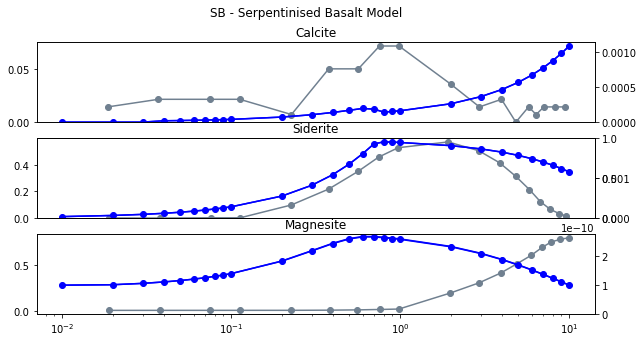

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle('SB - Serpentinised Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(10)

ax1.plot(xy_SB_CalVol_liu[0], xy_SB_CalVol_liu[1], color='slategrey', marker='o')
ax1.set_title("Calcite")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=0)
ax4 = ax1.twinx()
ax4.plot(xy_SB_CalVol_Dodd[0], xy_SB_CalVol_Dodd[1], color='Blue', marker='o')
ax4.plot(xy_SB_CalVol_adapted_Dodd[0], xy_SB_CalVol_adapted_Dodd[1], color='Blue', marker='.')
ax4.set_ylim(bottom=0)

ax2.plot(xy_SB_SidVol_liu[0], xy_SB_SidVol_liu[1], color='slategrey', marker='o')
ax2.set_title("Siderite")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax2.set_ylim(bottom=0)
ax5 = ax2.twinx()
ax5.plot(xy_SB_SidVol_Dodd[0], xy_SB_SidVol_Dodd[1], color='Blue', marker='o')
ax5.plot(xy_SB_SidVol_adapted_Dodd[0], xy_SB_SidVol_adapted_Dodd[1], color='Blue', marker='.')
ax5.set_ylim(bottom=0)
ax5.set_ylim(bottom=0)

ax3.plot(xy_SB_MagVol_liu[0], xy_SB_MagVol_liu[1], color='slategrey', marker='o')
ax3.set_title("Magnesite")
ax3.set_xscale("log")
ax6 = ax3.twinx()
ax6.plot(xy_SB_MagVol_Dodd[0], xy_SB_MagVol_Dodd[1], color='Blue', marker='o')
ax6.plot(xy_SB_MagVol_adapted_Dodd[0], xy_SB_MagVol_adapted_Dodd[1], color='Blue', marker='.')
ax6.set_ylim(bottom=0)
ax6 = ax2.twinx()

# Mineralogical Volume Comparison (Vertical) - By Basalt Model

In [17]:
xy_FB_CalVol_Dodd = df_prepper(df_FB, "Calcite", "volume")
xy_FB_SidVol_Dodd = df_prepper(df_FB, "Siderite", "volume")
xy_FB_MagVol_Dodd = df_prepper(df_FB, "Magnesite", "volume")
xy_FB_DioVol_Dodd = df_prepper(df_FB, "Diopside", "volume")
xy_FB_HedVol_Dodd = df_prepper(df_FB, "Hedenbergite", "volume")
xy_FB_ForVol_Dodd = df_prepper(df_FB, "Forsterite", "volume")
xy_FB_FayVol_Dodd = df_prepper(df_FB, "Fayalite", "volume")

xy_FB_CalVol_adapted_Dodd = df_prepper(df_FB_adapted, "Calcite", "volume")
xy_FB_SidVol_adapted_Dodd = df_prepper(df_FB_adapted, "Siderite", "volume")
xy_FB_MagVol_adapted_Dodd = df_prepper(df_FB_adapted, "Magnesite", "volume")
xy_FB_DioVol_adapted_Dodd = df_prepper(df_FB_adapted, "Diopside", "volume")
xy_FB_HedVol_adapted_Dodd = df_prepper(df_FB_adapted, "Hedenbergite", "volume")
xy_FB_ForVol_adapted_Dodd = df_prepper(df_FB_adapted, "Forsterite", "volume")
xy_FB_FayVol_adapted_Dodd = df_prepper(df_FB_adapted, "Fayalite", "volume")

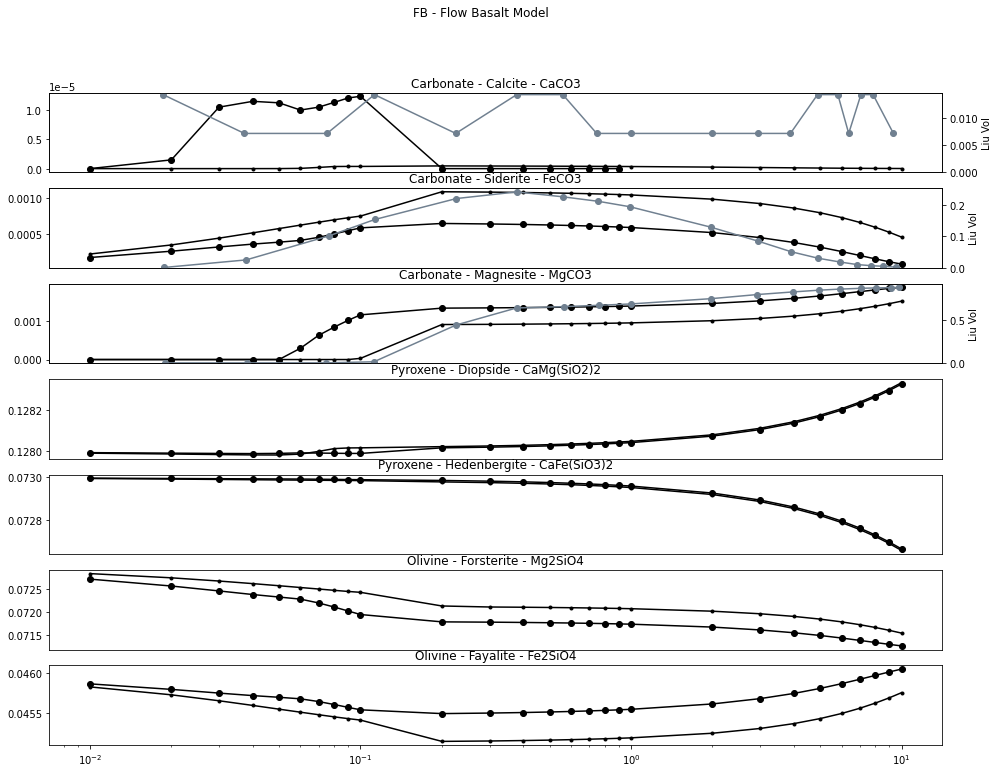

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1)
fig.suptitle('FB - Flow Basalt Model')

fig.set_figheight(12)
fig.set_figwidth(16)

ax1.plot(xy_FB_CalVol_Dodd[0], xy_FB_CalVol_Dodd[1], color='black', marker='o')
ax1.plot(xy_FB_CalVol_adapted_Dodd[0], xy_FB_CalVol_adapted_Dodd[1], color='black', marker='.')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax8 = ax1.twinx()
ax8.plot(xy_FB_CalVol_liu[0], xy_FB_CalVol_liu[1], color='slategrey', marker='o')
ax8.set_ylim(bottom=0)
ax8.set_ylabel('Liu Vol')

ax2.plot(xy_FB_SidVol_Dodd[0], xy_FB_SidVol_Dodd[1], color='black', marker='o')
ax2.plot(xy_FB_SidVol_adapted_Dodd[0], xy_FB_SidVol_adapted_Dodd[1], color='black', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax9 = ax2.twinx()
ax9.plot(xy_FB_SidVol_liu[0], xy_FB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(bottom=0)
ax9.set_ylabel('Liu Vol')

ax3.plot(xy_FB_MagVol_Dodd[0], xy_FB_MagVol_Dodd[1], color='black', marker='o')
ax3.plot(xy_FB_MagVol_adapted_Dodd[0], xy_FB_MagVol_adapted_Dodd[1], color='black', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax3.get_xaxis().set_visible(False)
ax10 = ax3.twinx()
ax10.plot(xy_FB_MagVol_liu[0], xy_FB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(bottom=0)
ax10.set_ylabel('Liu Vol')

ax4.plot(xy_FB_DioVol_Dodd[0], xy_FB_DioVol_Dodd[1], color='black', marker='o')
ax4.plot(xy_FB_DioVol_adapted_Dodd[0], xy_FB_DioVol_adapted_Dodd[1], color='black', marker='.')
ax4.set_title("Pyroxene - Diopside - CaMg(SiO2)2")
ax4.set_xscale("log")
ax4.get_xaxis().set_visible(False)

ax5.plot(xy_FB_HedVol_Dodd[0], xy_FB_HedVol_Dodd[1], color='black', marker='o')
ax5.plot(xy_FB_HedVol_adapted_Dodd[0], xy_FB_HedVol_adapted_Dodd[1], color='black', marker='.')
ax5.set_title("Pyroxene - Hedenbergite - CaFe(SiO3)2")
ax5.set_xscale("log")
ax5.get_xaxis().set_visible(False)

ax6.plot(xy_FB_ForVol_Dodd[0], xy_FB_ForVol_Dodd[1], color='black', marker='o')
ax6.plot(xy_FB_ForVol_adapted_Dodd[0], xy_FB_ForVol_adapted_Dodd[1], color='black', marker='.')
ax6.set_title("Olivine - Forsterite - Mg2SiO4")
ax6.set_xscale("log")
ax6.get_xaxis().set_visible(False)

ax7.plot(xy_FB_FayVol_Dodd[0], xy_FB_FayVol_Dodd[1], color='black', marker='o')
ax7.plot(xy_FB_FayVol_adapted_Dodd[0], xy_FB_FayVol_adapted_Dodd[1], color='black', marker='.')
ax7.set_title("Olivine - Fayalite - Fe2SiO4")
ax7.set_xscale("log")

In [19]:
xy_MB_CalVol_Dodd = df_prepper(df_MB, "Calcite", "volume")
xy_MB_SidVol_Dodd = df_prepper(df_MB, "Siderite", "volume")
xy_MB_MagVol_Dodd = df_prepper(df_MB, "Magnesite", "volume")
xy_MB_DioVol_Dodd = df_prepper(df_MB, "Diopside", "volume")
xy_MB_HedVol_Dodd = df_prepper(df_MB, "Hedenbergite", "volume")
xy_MB_AntVol_Dodd = df_prepper(df_MB, "Antigorite", "volume")
xy_MB_GreVol_Dodd = df_prepper(df_MB, "Greenalite", "volume")
xy_MB_ForVol_Dodd = df_prepper(df_MB, "Forsterite", "volume")
xy_MB_FayVol_Dodd = df_prepper(df_MB, "Fayalite", "volume")

xy_MB_CalVol_adapted_Dodd = df_prepper(df_MB_adapted, "Calcite", "volume")
xy_MB_SidVol_adapted_Dodd = df_prepper(df_MB_adapted, "Siderite", "volume")
xy_MB_MagVol_adapted_Dodd = df_prepper(df_MB_adapted, "Magnesite", "volume")
xy_MB_DioVol_adapted_Dodd = df_prepper(df_MB_adapted, "Diopside", "volume")
xy_MB_HedVol_adapted_Dodd = df_prepper(df_MB_adapted, "Hedenbergite", "volume")
xy_MB_AntVol_adapted_Dodd = df_prepper(df_MB_adapted, "Antigorite", "volume")
xy_MB_GreVol_adapted_Dodd = df_prepper(df_MB_adapted, "Greenalite", "volume")
xy_MB_ForVol_adapted_Dodd = df_prepper(df_MB_adapted, "Forsterite", "volume")
xy_MB_FayVol_adapted_Dodd = df_prepper(df_MB_adapted, "Fayalite", "volume")

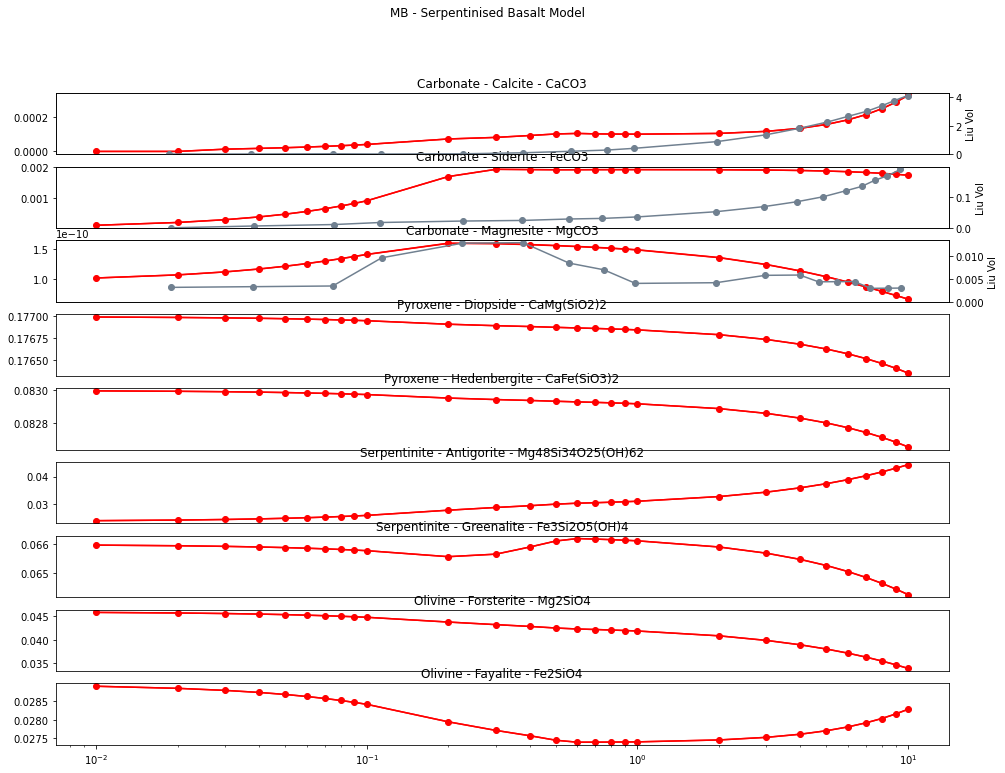

In [20]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1)
fig.suptitle('MB - Serpentinised Basalt Model')

fig.set_figheight(12)
fig.set_figwidth(16)

ax1.plot(xy_MB_CalVol_Dodd[0], xy_MB_CalVol_Dodd[1], color='red', marker='o')
ax1.plot(xy_MB_CalVol_adapted_Dodd[0], xy_MB_CalVol_adapted_Dodd[1], color='red', marker='.')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax10 = ax1.twinx()
ax10.plot(xy_MB_CalVol_liu[0], xy_MB_CalVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(bottom=0)
ax10.set_ylabel('Liu Vol')

ax2.plot(xy_MB_SidVol_Dodd[0], xy_MB_SidVol_Dodd[1], color='red', marker='o')
ax2.plot(xy_MB_SidVol_adapted_Dodd[0], xy_MB_SidVol_adapted_Dodd[1], color='red', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax11 = ax2.twinx()
ax11.plot(xy_MB_SidVol_liu[0], xy_MB_SidVol_liu[1], color='slategrey', marker='o')
ax11.set_ylim(bottom=0)
ax11.set_ylabel('Liu Vol')

ax3.plot(xy_MB_MagVol_Dodd[0], xy_MB_MagVol_Dodd[1], color='red', marker='o')
ax3.plot(xy_MB_MagVol_adapted_Dodd[0], xy_MB_MagVol_adapted_Dodd[1], color='red', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax3.get_xaxis().set_visible(False)
ax12 = ax3.twinx()
ax12.plot(xy_MB_MagVol_liu[0], xy_MB_MagVol_liu[1], color='slategrey', marker='o')
ax12.set_ylim(bottom=0)
ax12.set_ylabel('Liu Vol')

ax4.plot(xy_MB_DioVol_Dodd[0], xy_MB_DioVol_Dodd[1], color='red', marker='o')
ax4.plot(xy_MB_DioVol_adapted_Dodd[0], xy_MB_DioVol_adapted_Dodd[1], color='red', marker='.')
ax4.set_title("Pyroxene - Diopside - CaMg(SiO2)2")
ax4.set_xscale("log")
ax4.get_xaxis().set_visible(False)

ax5.plot(xy_MB_HedVol_Dodd[0], xy_MB_HedVol_Dodd[1], color='red', marker='o')
ax5.plot(xy_MB_HedVol_adapted_Dodd[0], xy_MB_HedVol_adapted_Dodd[1], color='red', marker='.')
ax5.set_title("Pyroxene - Hedenbergite - CaFe(SiO3)2")
ax5.set_xscale("log")
ax5.get_xaxis().set_visible(False)

ax6.plot(xy_MB_AntVol_Dodd[0], xy_MB_AntVol_Dodd[1], color='red', marker='o')
ax6.plot(xy_MB_AntVol_adapted_Dodd[0], xy_MB_AntVol_adapted_Dodd[1], color='red', marker='.')
ax6.set_title("Serpentinite - Antigorite - Mg48Si34O25(OH)62")
ax6.set_xscale("log")
ax6.get_xaxis().set_visible(False)

ax7.plot(xy_MB_GreVol_Dodd[0], xy_MB_GreVol_Dodd[1], color='red', marker='o')
ax7.plot(xy_MB_GreVol_adapted_Dodd[0], xy_MB_GreVol_adapted_Dodd[1], color='red', marker='.')
ax7.set_title("Serpentinite - Greenalite - Fe3Si2O5(OH)4")
ax7.set_xscale("log")
ax7.get_xaxis().set_visible(False)

ax8.plot(xy_MB_ForVol_Dodd[0], xy_MB_ForVol_Dodd[1], color='red', marker='o')
ax8.plot(xy_MB_ForVol_adapted_Dodd[0], xy_MB_ForVol_adapted_Dodd[1], color='red', marker='.')
ax8.set_title("Olivine - Forsterite - Mg2SiO4")
ax8.set_xscale("log")
ax8.get_xaxis().set_visible(False)

ax9.plot(xy_MB_FayVol_Dodd[0], xy_MB_FayVol_Dodd[1], color='red', marker='o')
ax9.plot(xy_MB_FayVol_adapted_Dodd[0], xy_MB_FayVol_adapted_Dodd[1], color='red', marker='.')
ax9.set_title("Olivine - Fayalite - Fe2SiO4")
ax9.set_xscale("log")

In [21]:
xy_SB_CalVol_Dodd = df_prepper(df_SB, "Calcite", "volume")
xy_SB_SidVol_Dodd = df_prepper(df_SB, "Siderite", "volume")
xy_SB_MagVol_Dodd = df_prepper(df_SB, "Magnesite", "volume")
xy_SB_DioVol_Dodd = df_prepper(df_SB, "Diopside", "volume")
xy_SB_HedVol_Dodd = df_prepper(df_SB, "Hedenbergite", "volume")
xy_SB_AntVol_Dodd = df_prepper(df_SB, "Antigorite", "volume")
xy_SB_GreVol_Dodd = df_prepper(df_SB, "Greenalite", "volume")

xy_SB_CalVol_adapted_Dodd = df_prepper(df_SB_adapted, "Calcite", "volume")
xy_SB_SidVol_adapted_Dodd = df_prepper(df_SB_adapted, "Siderite", "volume")
xy_SB_MagVol_adapted_Dodd = df_prepper(df_SB_adapted, "Magnesite", "volume")
xy_SB_DioVol_adapted_Dodd = df_prepper(df_SB_adapted, "Diopside", "volume")
xy_SB_HedVol_adapted_Dodd = df_prepper(df_SB_adapted, "Hedenbergite", "volume")
xy_SB_AntVol_adapted_Dodd = df_prepper(df_SB_adapted, "Antigorite", "volume")
xy_SB_GreVol_adapted_Dodd = df_prepper(df_SB_adapted, "Greenalite", "volume")

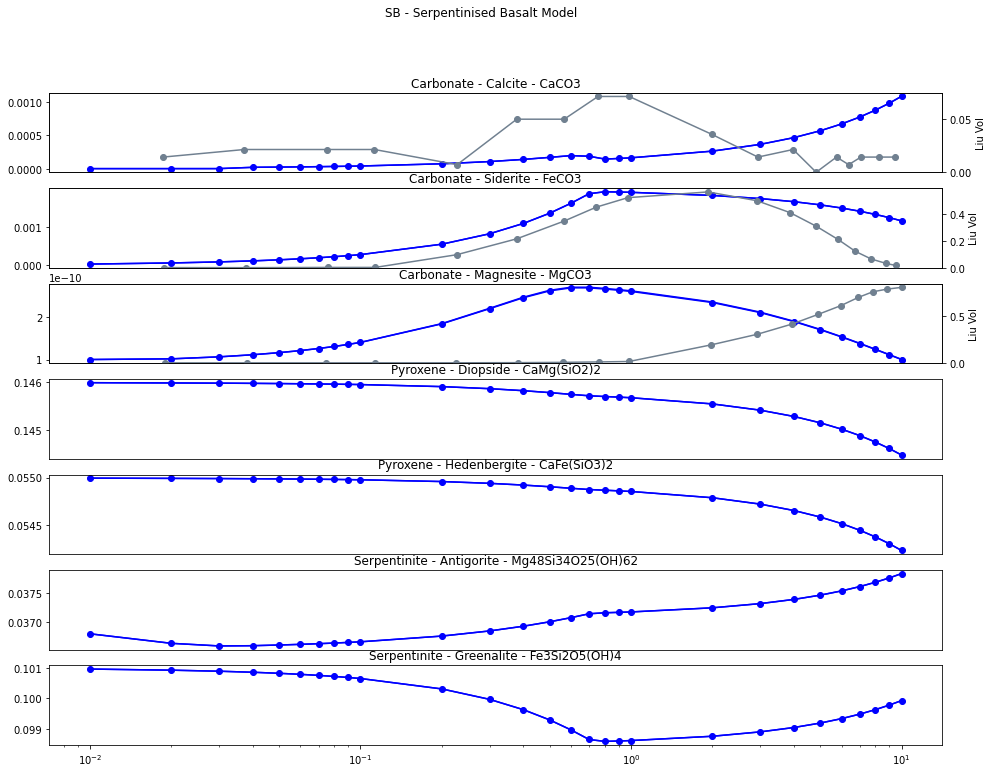

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1)
fig.suptitle('SB - Serpentinised Basalt Model')

fig.set_figheight(12)
fig.set_figwidth(16)

ax1.plot(xy_SB_CalVol_Dodd[0], xy_SB_CalVol_Dodd[1], color='Blue', marker='o')
ax1.plot(xy_SB_CalVol_adapted_Dodd[0], xy_SB_CalVol_adapted_Dodd[1], color='Blue', marker='.')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax8 = ax1.twinx()
ax8.plot(xy_SB_CalVol_liu[0], xy_SB_CalVol_liu[1], color='slategrey', marker='o')
ax8.set_ylim(bottom=0)
ax8.set_ylabel('Liu Vol')

ax2.plot(xy_SB_SidVol_Dodd[0], xy_SB_SidVol_Dodd[1], color='Blue', marker='o')
ax2.plot(xy_SB_SidVol_adapted_Dodd[0], xy_SB_SidVol_adapted_Dodd[1], color='Blue', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax9 = ax2.twinx()
ax9.plot(xy_SB_SidVol_liu[0], xy_SB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(bottom=0)
ax9.set_ylabel('Liu Vol')

ax3.plot(xy_SB_MagVol_Dodd[0], xy_SB_MagVol_Dodd[1], color='Blue', marker='o')
ax3.plot(xy_SB_MagVol_adapted_Dodd[0], xy_SB_MagVol_adapted_Dodd[1], color='Blue', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax3.get_xaxis().set_visible(False)
ax10 = ax3.twinx()
ax10.plot(xy_SB_MagVol_liu[0], xy_SB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(bottom=0)
ax10.set_ylabel('Liu Vol')

ax4.plot(xy_SB_DioVol_Dodd[0], xy_SB_DioVol_Dodd[1], color='Blue', marker='o')
ax4.plot(xy_SB_DioVol_adapted_Dodd[0], xy_SB_DioVol_adapted_Dodd[1], color='Blue', marker='.')
ax4.set_title("Pyroxene - Diopside - CaMg(SiO2)2")
ax4.set_xscale("log")
ax4.get_xaxis().set_visible(False)

ax5.plot(xy_SB_HedVol_Dodd[0], xy_SB_HedVol_Dodd[1], color='Blue', marker='o')
ax5.plot(xy_SB_HedVol_adapted_Dodd[0], xy_SB_HedVol_adapted_Dodd[1], color='Blue', marker='.')
ax5.set_title("Pyroxene - Hedenbergite - CaFe(SiO3)2")
ax5.set_xscale("log")
ax5.get_xaxis().set_visible(False)

ax6.plot(xy_SB_AntVol_Dodd[0], xy_SB_AntVol_Dodd[1], color='Blue', marker='o')
ax6.plot(xy_SB_AntVol_adapted_Dodd[0], xy_SB_AntVol_adapted_Dodd[1], color='Blue', marker='.')
ax6.set_title("Serpentinite - Antigorite - Mg48Si34O25(OH)62")
ax6.set_xscale("log")
ax6.get_xaxis().set_visible(False)

ax7.plot(xy_SB_GreVol_Dodd[0], xy_SB_GreVol_Dodd[1], color='Blue', marker='o')
ax7.plot(xy_SB_GreVol_adapted_Dodd[0], xy_SB_GreVol_adapted_Dodd[1], color='Blue', marker='.')
ax7.set_title("Serpentinite - Greenalite - Fe3Si2O5(OH)4")
ax7.set_xscale("log")

# Mineralogical Volume Comparison (Horizontal) - By Basalt Model

In [23]:
xy_FB_CalVol_Dodd = df_prepper(df_FB, "Calcite", "volume")
xy_FB_SidVol_Dodd = df_prepper(df_FB, "Siderite", "volume")
xy_FB_MagVol_Dodd = df_prepper(df_FB, "Magnesite", "volume")
xy_FB_DioVol_Dodd = df_prepper(df_FB, "Diopside", "volume")
xy_FB_HedVol_Dodd = df_prepper(df_FB, "Hedenbergite", "volume")
xy_FB_ForVol_Dodd = df_prepper(df_FB, "Forsterite", "volume")
xy_FB_FayVol_Dodd = df_prepper(df_FB, "Fayalite", "volume")

xy_FB_CalVol_adapted_Dodd = df_prepper(df_FB_adapted, "Calcite", "volume")
xy_FB_SidVol_adapted_Dodd = df_prepper(df_FB_adapted, "Siderite", "volume")
xy_FB_MagVol_adapted_Dodd = df_prepper(df_FB_adapted, "Magnesite", "volume")
xy_FB_DioVol_adapted_Dodd = df_prepper(df_FB_adapted, "Diopside", "volume")
xy_FB_HedVol_adapted_Dodd = df_prepper(df_FB_adapted, "Hedenbergite", "volume")
xy_FB_ForVol_adapted_Dodd = df_prepper(df_FB_adapted, "Forsterite", "volume")
xy_FB_FayVol_adapted_Dodd = df_prepper(df_FB_adapted, "Fayalite", "volume")

x_FB_CarbVol_Dodd = xy_FB_CalVol_Dodd[0] + xy_FB_SidVol_Dodd[0] + xy_FB_MagVol_Dodd[0]
x_FB_CarbVol_adapted_Dodd = xy_FB_CalVol_adapted_Dodd[0] + xy_FB_SidVol_adapted_Dodd[0] + xy_FB_MagVol_adapted_Dodd[0]
y_FB_CarbVol_Dodd = xy_FB_CalVol_Dodd[1] + xy_FB_SidVol_Dodd[1] + xy_FB_MagVol_Dodd[1]
y_FB_CarbVol_adapted_Dodd = xy_FB_CalVol_adapted_Dodd[1] + xy_FB_SidVol_adapted_Dodd[1] + xy_FB_MagVol_adapted_Dodd[0]
xy_FB_CarbVol_Dodd = x_FB_CarbVol_Dodd, y_FB_CarbVol_Dodd
xy_FB_CarbVol_adapted_Dodd = x_FB_CarbVol_adapted_Dodd, y_FB_CarbVol_adapted_Dodd

Text(0, 0.5, 'Liu - Mineral Volume (dec. %)')

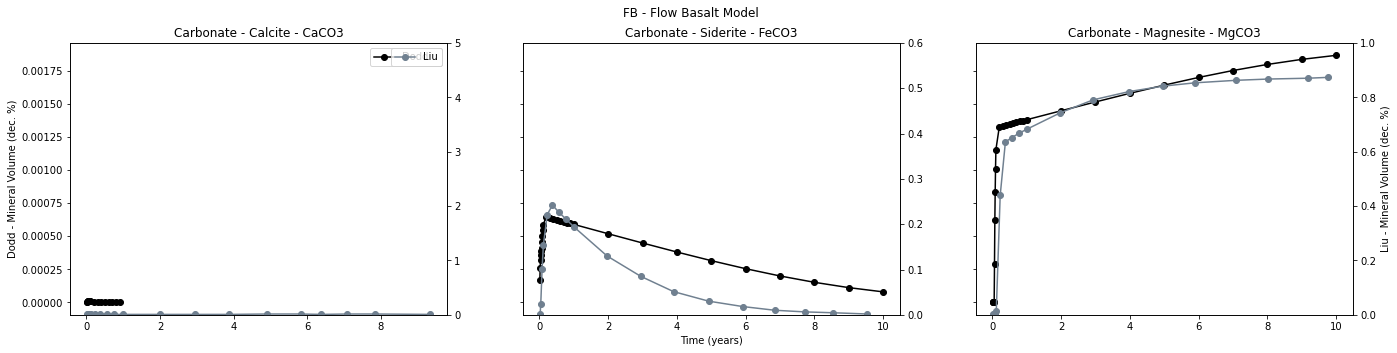

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('FB - Flow Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(xy_FB_CalVol_Dodd[0], xy_FB_CalVol_Dodd[1], color='black', marker='o', label='Dodd   ')
# ax1.plot(xy_FB_CalVol_adapted_Dodd[0], xy_FB_CalVol_adapted_Dodd[1], color='black', marker='.', label='Dodd Adapted   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
# ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(xy_FB_CalVol_liu[0], xy_FB_CalVol_liu[1], color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=5, bottom=0)
ax8.legend()

ax2.plot(xy_FB_SidVol_Dodd[0], xy_FB_SidVol_Dodd[1], color='black', marker='o')
# ax2.plot(xy_FB_SidVol_adapted_Dodd[0], xy_FB_SidVol_adapted_Dodd[1], color='black', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
# ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(xy_FB_SidVol_liu[0], xy_FB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(top=0.6, bottom=0)

ax3.plot(xy_FB_MagVol_Dodd[0], xy_FB_MagVol_Dodd[1], color='black', marker='o')
# ax3.plot(xy_FB_MagVol_adapted_Dodd[0], xy_FB_MagVol_adapted_Dodd[1], color='black', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
# ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(xy_FB_MagVol_liu[0], xy_FB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (dec. %)')

# ax4.plot(xy_FB_CarbVol_Dodd[0], xy_FB_CarbVol_Dodd[1], color='black', marker='o', label='Dodd   ')
# ax4.plot(xy_FB_CarbVol_adapted_Dodd[0], xy_FB_CarbVol_adapted_Dodd[1], color='black', marker='.', label='Dodd Adapted   ')
# ax4.set_title("Carbonate - Total - XCO3")
# ax4.set_xscale("log")
# ax4.set_ylabel('Dodd - Mineral Volume (dec. %)')
# ax4.legend()

Text(0, 0.5, 'Liu - Mineral Volume (dec. %)')

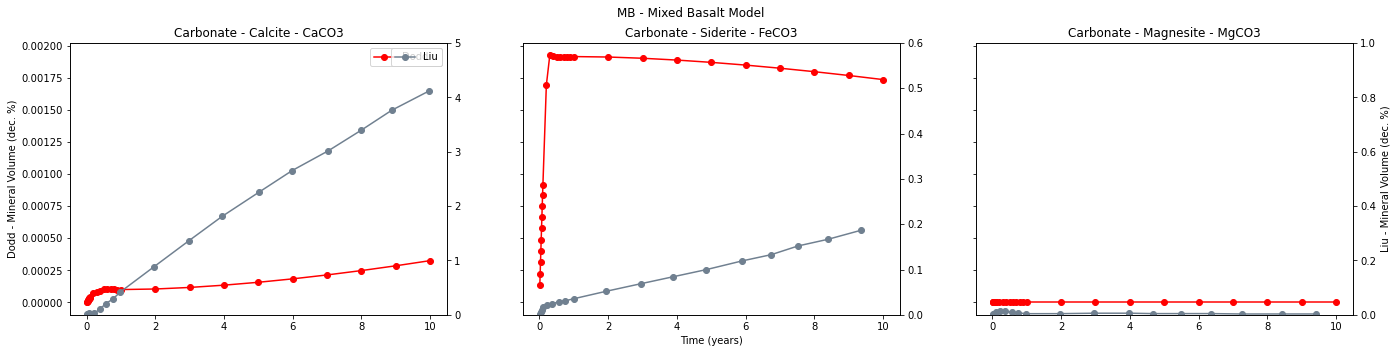

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('MB - Mixed Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(xy_MB_CalVol_Dodd[0], xy_MB_CalVol_Dodd[1], color='red', marker='o', label='Dodd   ')
# ax1.plot(xy_MB_CalVol_adapted_Dodd[0], xy_MB_CalVol_adapted_Dodd[1], color='red', marker='.', label='Dodd Adapted   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
# ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(xy_MB_CalVol_liu[0], xy_MB_CalVol_liu[1], color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=5, bottom=0)
ax8.legend()

ax2.plot(xy_MB_SidVol_Dodd[0], xy_MB_SidVol_Dodd[1], color='red', marker='o')
# ax2.plot(xy_MB_SidVol_adapted_Dodd[0], xy_MB_SidVol_adapted_Dodd[1], color='red', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
# ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(xy_MB_SidVol_liu[0], xy_MB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(top=0.6, bottom=0)

ax3.plot(xy_MB_MagVol_Dodd[0], xy_MB_MagVol_Dodd[1], color='red', marker='o')
# ax3.plot(xy_MB_MagVol_adapted_Dodd[0], xy_MB_MagVol_adapted_Dodd[1], color='red', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
# ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(xy_MB_MagVol_liu[0], xy_MB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (dec. %)')

Text(0, 0.5, 'Liu - Mineral Volume (dec. %)')

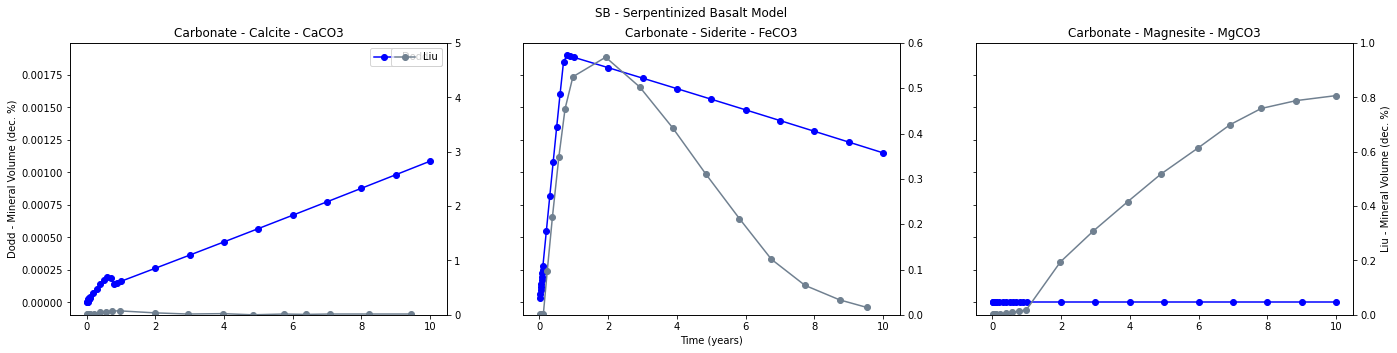

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.suptitle('SB - Serpentinized Basalt Model')

fig.set_figheight(5)
fig.set_figwidth(23)

ax1.plot(xy_SB_CalVol_Dodd[0], xy_SB_CalVol_Dodd[1], color='blue', marker='o', label='Dodd   ')
# ax1.plot(xy_SB_CalVol_adapted_Dodd[0], xy_SB_CalVol_adapted_Dodd[1], color='blue', marker='.', label='Dodd Adapted   ')
ax1.set_title("Carbonate - Calcite - CaCO3")
# ax1.set_xscale("log")
ax1.set_ylabel('Dodd - Mineral Volume (dec. %)')
ax1.legend()
ax8 = ax1.twinx()
ax8.plot(xy_SB_CalVol_liu[0], xy_SB_CalVol_liu[1], color='slategrey', marker='o', label='Liu')
ax8.set_ylim(top=5, bottom=0)
ax8.legend()

ax2.plot(xy_SB_SidVol_Dodd[0], xy_SB_SidVol_Dodd[1], color='blue', marker='o')
# ax2.plot(xy_SB_SidVol_adapted_Dodd[0], xy_SB_SidVol_adapted_Dodd[1], color='blue', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
# ax2.set_xscale("log")
ax2.set_xlabel('Time (years)')
ax9 = ax2.twinx()
ax9.plot(xy_SB_SidVol_liu[0], xy_SB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(top=0.6, bottom=0)

ax3.plot(xy_SB_MagVol_Dodd[0], xy_SB_MagVol_Dodd[1], color='blue', marker='o')
# ax3.plot(xy_SB_MagVol_adapted_Dodd[0], xy_SB_MagVol_adapted_Dodd[1], color='blue', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
# ax3.set_xscale("log")
ax10 = ax3.twinx()
ax10.plot(xy_SB_MagVol_liu[0], xy_SB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(top=1, bottom=0)
ax10.set_ylabel('Liu - Mineral Volume (dec. %)')

# Mineralogical Volume & Key Parameters Comparison - By Basaltic Model

In [27]:
xy_FB_CalVol_Dodd = df_prepper(df_FB, "Calcite", "volume")
xy_FB_SidVol_Dodd = df_prepper(df_FB, "Siderite", "volume")
xy_FB_MagVol_Dodd = df_prepper(df_FB, "Magnesite", "volume")
xy_FB_DioVol_Dodd = df_prepper(df_FB, "Diopside", "volume")
xy_FB_HedVol_Dodd = df_prepper(df_FB, "Hedenbergite", "volume")
xy_FB_ForVol_Dodd = df_prepper(df_FB, "Forsterite", "volume")
xy_FB_FayVol_Dodd = df_prepper(df_FB, "Fayalite", "volume")

xy_FB_CalVol_adapted_Dodd = df_prepper(df_FB_adapted, "Calcite", "volume")
xy_FB_SidVol_adapted_Dodd = df_prepper(df_FB_adapted, "Siderite", "volume")
xy_FB_MagVol_adapted_Dodd = df_prepper(df_FB_adapted, "Magnesite", "volume")
xy_FB_DioVol_adapted_Dodd = df_prepper(df_FB_adapted, "Diopside", "volume")
xy_FB_HedVol_adapted_Dodd = df_prepper(df_FB_adapted, "Hedenbergite", "volume")
xy_FB_ForVol_adapted_Dodd = df_prepper(df_FB_adapted, "Forsterite", "volume")
xy_FB_FayVol_adapted_Dodd = df_prepper(df_FB_adapted, "Fayalite", "volume")


xy_FB_pHpH_Dodd = df_prepper(df_FB, "pH", "pH")
xy_FB_CaConc_Dodd = df_prepper(df_FB, "Ca++", "conc")
xy_FB_FeConc_Dodd = df_prepper(df_FB, "Fe++", "conc")
xy_FB_MgConc_Dodd = df_prepper(df_FB, "Mg++", "conc")
xy_FB_CO2Conc_Dodd = df_prepper(df_FB, "CO2(aq)", "conc")
xy_FB_HCO3Conc_Dodd = df_prepper(df_FB, "HCO3-", "conc")
xy_FB_CO3Conc_Dodd = df_prepper(df_FB, "CO3--", "conc")

xy_FB_pHpH_adapted_Dodd = df_prepper(df_FB_adapted, "pH", "pH")
xy_FB_CaConc_adapted_Dodd = df_prepper(df_FB_adapted, "Ca++", "conc")
xy_FB_FeConc_adapted_Dodd = df_prepper(df_FB_adapted, "Fe++", "conc")
xy_FB_MgConc_adapted_Dodd = df_prepper(df_FB_adapted, "Mg++", "conc")
xy_FB_CO2Conc_adapted_Dodd = df_prepper(df_FB_adapted, "CO2(aq)", "conc")
xy_FB_HCO3Conc_adapted_Dodd = df_prepper(df_FB_adapted, "HCO3-", "conc")
xy_FB_CO3Conc_adapted_Dodd = df_prepper(df_FB_adapted, "CO3--", "conc")

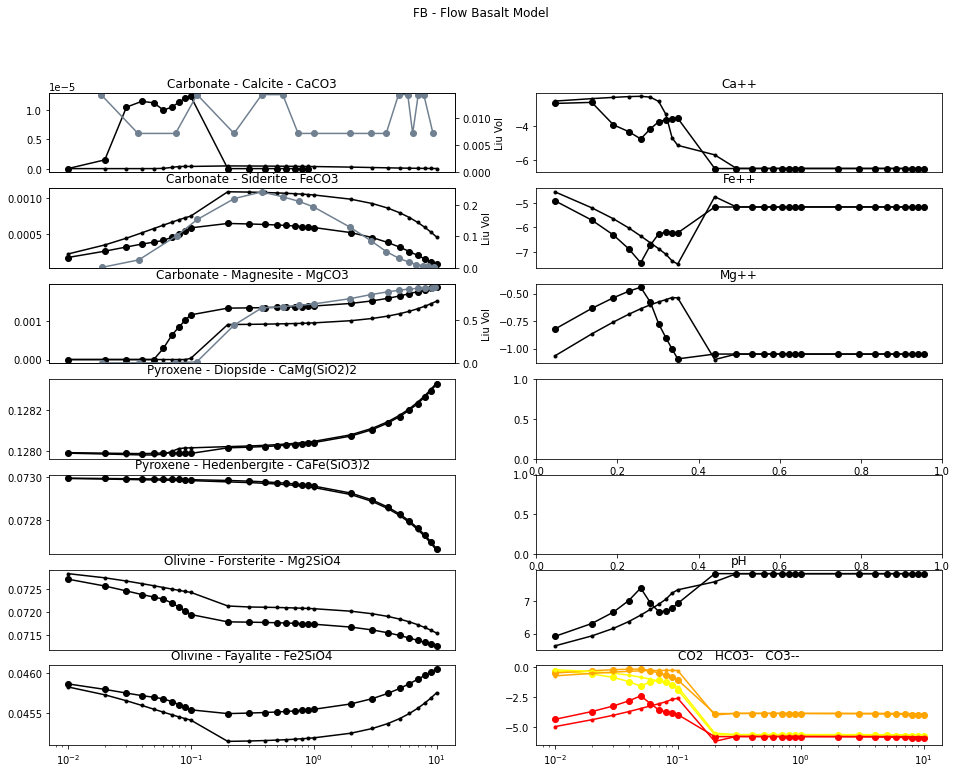

In [28]:
fig, ((ax1, ax11),(ax2, ax12),(ax3, ax13),(ax4, ax14),(ax5, ax15),(ax6, ax16),(ax7, ax17)) = plt.subplots(7,2)
fig.suptitle('FB - Flow Basalt Model')

fig.set_figheight(12)
fig.set_figwidth(16)

ax1.plot(xy_FB_CalVol_Dodd[0], xy_FB_CalVol_Dodd[1], color='black', marker='o')
ax1.plot(xy_FB_CalVol_adapted_Dodd[0], xy_FB_CalVol_adapted_Dodd[1], color='black', marker='.')
ax1.set_title("Carbonate - Calcite - CaCO3")
ax1.set_xscale("log")
ax1.get_xaxis().set_visible(False)
ax8 = ax1.twinx()
ax8.plot(xy_FB_CalVol_liu[0], xy_FB_CalVol_liu[1], color='slategrey', marker='o')
ax8.set_ylim(bottom=0)
ax8.set_ylabel('Liu Vol')

ax2.plot(xy_FB_SidVol_Dodd[0], xy_FB_SidVol_Dodd[1], color='black', marker='o')
ax2.plot(xy_FB_SidVol_adapted_Dodd[0], xy_FB_SidVol_adapted_Dodd[1], color='black', marker='.')
ax2.set_title("Carbonate - Siderite - FeCO3")
ax2.set_xscale("log")
ax2.get_xaxis().set_visible(False)
ax9 = ax2.twinx()
ax9.plot(xy_FB_SidVol_liu[0], xy_FB_SidVol_liu[1], color='slategrey', marker='o')
ax9.set_ylim(bottom=0)
ax9.set_ylabel('Liu Vol')

ax3.plot(xy_FB_MagVol_Dodd[0], xy_FB_MagVol_Dodd[1], color='black', marker='o')
ax3.plot(xy_FB_MagVol_adapted_Dodd[0], xy_FB_MagVol_adapted_Dodd[1], color='black', marker='.')
ax3.set_title("Carbonate - Magnesite - MgCO3")
ax3.set_xscale("log")
ax3.get_xaxis().set_visible(False)
ax10 = ax3.twinx()
ax10.plot(xy_FB_MagVol_liu[0], xy_FB_MagVol_liu[1], color='slategrey', marker='o')
ax10.set_ylim(bottom=0)
ax10.set_ylabel('Liu Vol')

ax4.plot(xy_FB_DioVol_Dodd[0], xy_FB_DioVol_Dodd[1], color='black', marker='o')
ax4.plot(xy_FB_DioVol_adapted_Dodd[0], xy_FB_DioVol_adapted_Dodd[1], color='black', marker='.')
ax4.set_title("Pyroxene - Diopside - CaMg(SiO2)2")
ax4.set_xscale("log")
ax4.get_xaxis().set_visible(False)

ax5.plot(xy_FB_HedVol_Dodd[0], xy_FB_HedVol_Dodd[1], color='black', marker='o')
ax5.plot(xy_FB_HedVol_adapted_Dodd[0], xy_FB_HedVol_adapted_Dodd[1], color='black', marker='.')
ax5.set_title("Pyroxene - Hedenbergite - CaFe(SiO3)2")
ax5.set_xscale("log")
ax5.get_xaxis().set_visible(False)

ax6.plot(xy_FB_ForVol_Dodd[0], xy_FB_ForVol_Dodd[1], color='black', marker='o')
ax6.plot(xy_FB_ForVol_adapted_Dodd[0], xy_FB_ForVol_adapted_Dodd[1], color='black', marker='.')
ax6.set_title("Olivine - Forsterite - Mg2SiO4")
ax6.set_xscale("log")
ax6.get_xaxis().set_visible(False)

ax7.plot(xy_FB_FayVol_Dodd[0], xy_FB_FayVol_Dodd[1], color='black', marker='o')
ax7.plot(xy_FB_FayVol_adapted_Dodd[0], xy_FB_FayVol_adapted_Dodd[1], color='black', marker='.')
ax7.set_title("Olivine - Fayalite - Fe2SiO4")
ax7.set_xscale("log")



ax11.plot(xy_FB_CaConc_Dodd[0], xy_FB_CaConc_Dodd[1], color='black', marker='o')
ax11.plot(xy_FB_CaConc_adapted_Dodd[0], xy_FB_CaConc_adapted_Dodd[1], color='black', marker='.')
ax11.set_title("Ca++")
ax11.set_xscale("log")
ax11.get_xaxis().set_visible(False)

ax12.plot(xy_FB_FeConc_Dodd[0], xy_FB_FeConc_Dodd[1], color='black', marker='o')
ax12.plot(xy_FB_FeConc_adapted_Dodd[0], xy_FB_FeConc_adapted_Dodd[1], color='black', marker='.')
ax12.set_title("Fe++")
ax12.set_xscale("log")
ax12.get_xaxis().set_visible(False)

ax13.plot(xy_FB_MgConc_Dodd[0], xy_FB_MgConc_Dodd[1], color='black', marker='o')
ax13.plot(xy_FB_MgConc_adapted_Dodd[0], xy_FB_MgConc_adapted_Dodd[1], color='black', marker='.')
ax13.set_title("Mg++")
ax13.set_xscale("log")
ax13.get_xaxis().set_visible(False)

ax16.plot(xy_FB_pHpH_Dodd[0], xy_FB_pHpH_Dodd[1], color='black', marker='o')
ax16.plot(xy_FB_pHpH_adapted_Dodd[0], xy_FB_pHpH_adapted_Dodd[1], color='black', marker='.')
ax16.set_title("pH")
ax16.set_xscale("log")
ax16.get_xaxis().set_visible(False)

ax17.plot(xy_FB_CO2Conc_Dodd[0], xy_FB_CO2Conc_Dodd[1], color='yellow', marker='o')
ax17.plot(xy_FB_HCO3Conc_Dodd[0], xy_FB_HCO3Conc_Dodd[1], color='orange', marker='o')
ax17.plot(xy_FB_CO3Conc_Dodd[0], xy_FB_CO3Conc_Dodd[1], color='red', marker='o')
ax17.plot(xy_FB_CO2Conc_adapted_Dodd[0], xy_FB_CO2Conc_adapted_Dodd[1], color='yellow', marker='.')
ax17.plot(xy_FB_HCO3Conc_adapted_Dodd[0], xy_FB_HCO3Conc_adapted_Dodd[1], color='orange', marker='.')
ax17.plot(xy_FB_CO3Conc_adapted_Dodd[0], xy_FB_CO3Conc_adapted_Dodd[1], color='red', marker='.')
ax17.set_title("CO2   HCO3-   CO3--")
ax17.set_xscale("log")